# Programming for Data Analysis Assignment 1 Notebook

Author - Sean Humphreys

---

## Contents

1. [Introduction](#introduction)
2. [Definitions](#definitions)
3. [Dataset Exploration](#dataset-exploration)
4. [Dataset Variables](#dataset-variables)
5. [Random Probability Distribution](#random-probability-distribution)
4. [References](#references)
5. [Associated Reading](#associated-reading)

---

## Introduction <a id="introduction"></a>

The dataset explored and synthesised in this notebook is from a weather sensor in the author's back garden. The data extract is in the form of a csv. The source data csv can be accessed [here](datasets/back_garden_sensor_data_12_months.csv). The extract contains local weather data captured over a 12 month period.

---

## Definitions <a id="definitions"></a>

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accesssed 8 Nov. 2023) - is an opensource software library for creating static, animated, and interactive visualizations in Python.
- [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 8. Nov 2023) - is an opensource software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure.

---

## Dataset Exploration <a id="dataset-exploration"></a>

Import the Pandas software library. Pandas can be used to make datasets clean and process datasets.

In [ ]:
# import the required python libraries
import pandas as pd

Read in the source data CSV file.

In [ ]:
# use pandas to read in the dataset
garden_weather = pd.read_csv('datasets/back_garden_sensor_data_12_months.csv')

Visually inspect the top and bottom of the dataframe to ascertain if there is any obvious data quality issues. This is done using the Pandas `head()` and `tail()` methods. The frist and last 5 rows of data are checked.

In [ ]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.head()

In [ ]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.tail()

Using Pandas the column names can be renamed to make them python friendly.

In [ ]:
# python friendly column names list
column_rename = ['date_time', 'wind_speed_m_s', 'gust_m_s', 'humidity_%', 'chill_celsius', 'chill_minimum_celsius', 
                 'temperature_average_celsius', 'temperature_range_low_celsius', 'temperature_range_high_celsius', 'outside_air_pres_hPa']

# rename columns - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ [Accessed 7 Nov. 2023].
garden_weather.columns = column_rename

The Pandas `info()` method is used to print more information about the DataFrame. The renamed columns can be seen in the output of this command. The Pandas Dtype (datatype) is displayed.

In [ ]:
# Code from https://www.w3schools.com/python/pandas/ref_df_info.asp [Accessed 7 Nov. 2023].
garden_weather.info()

The range index indicates that there are 360 rows in the dataset.

The variables in the *date_time* column are stored as objects. The Pandas object datatype is used to store text or mixed numeric and non-numeric values (Moffitt, 2018). The values in this column are character strings and do not provide any datetime operations (e.g. extract the year, day of the week, etc.). The Pandas `to_datetime()` function can be applied to this data. Pandas interprets the strings and convert these to datetime objects. This allows for examining details during specific time periods of interest, and zooming out to explore variations on different time scales, such as monthly or annual aggregations, recurring patterns, and long-term trends (Walker, 2019).

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
garden_weather['time_series'] = pd.to_datetime(garden_weather['date_time'], dayfirst=True, format='%d/%m/%Y %H:%M')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
garden_weather = garden_weather.set_index('time_series')

The rest of the variables in the dataset are stored as 64bit floating point integers. 64-bit datatypes allow for a high degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.

Of note, there is an issue caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python and could lead to inaccuracies when modelling data.

After re-indexing the DataFrame a quick visual check can be made to validate the changes. 

In [ ]:
# quick visual validation of the changes to the dataframe
garden_weather.head()

The dataset can be checked for missing values using the `isnull()` function chained with the `sum()` function.

In [ ]:
# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ - [Accessed 7 Nov. 2023].
garden_weather.isnull().sum()

One null values is demonstrated in all of the columns except the *date_time* column. The presence of missing values in any dataset is an issue in so far as it can create a lack of relatability or trustworthiness in the dataset (Kumar, 2021). Consequently, if a strategy to manage missing values during model development is not employed insight could be lost leading to incorrect results (Tamboli, 2021). To synthesis or model the dataset the null values will need to be managed.

Inspect the dataset for any duplicate rows across all columns.

In [ ]:
# https://www.statology.org/pandas-find-duplicates/ [Accessed 07 Nov.2023]
duplicate_rows = garden_weather[garden_weather.duplicated()]

duplicate_rows

No duplicate rows are demonstrated.

## Dataset Variables <a id="dataset-variables"></a>

The dataset consists of 10 variables. When examining the dataset variables it is useful to look at their classification as this in turn will dictate how they can be analysed.

**Variable Classification Summary Table** (Summarised from Sharma, 2020)

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

**Levels of Measurement Summary Table**

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              |
| Ordinal           | The data can be categorized and ranked                                        |
| Interval          | The data can be categorized, ranked, and evenly spaced                        |
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    |

Applying variable classification and level of measurement the dataset can be summarised as follows:

**Variable Summary Table**

| Variable                      | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------                   | :----------       | :----------   | :----------   | :---------        | :---------        |
| date_time                     | numerical         | *             | Object        | date              | interval          |
| wind_speed_m_s                | numerical         | continuous    | float64       | m/s               | ratio             |
| gust_m_s                      | numerical         | continuous    | float64       | m/s               | ratio             |
| humidity_%                    | numerical         | continuous    | float64       | mm                | ratio             |
| chill_celsius                 | numerical         | continuous    | float64       | mm                | ratio             |
| chill_minimum_celsius         | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_average_celsius   | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_low_celsius | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_high_celsius| numerical         | continuous    | float64       | degrees celcius   | interval          |
| outside_air_pres_hPa          | numerical         | continuous    | float64       | hPa               | interval          |

\* date and time can be continuous or discreet depending on use (Treadwell, 2014).

Complex mathematical operations can be carried out on interval and ratio datatypes. Measures of central tendancy on these datatypes include mode, median and arithemtic mean (Bhandari, 2020). The measure of variability include range, interquartile range standard deviation and variance (op. cit.). Knowing these measures for the variable will enable modelling of the data. These values can be automatically calculated using the Pandas `describe()` method (www.javatpoint.com, n.d.).

In [ ]:
# assign variable so that values can be accessed later
data_summary = garden_weather.describe()
data_summary

---

## Random Probability Distribution <a id="random-probability-distribution"></a>

*"In probability theory and statistics, a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment."* (Wikipedia Contributors, 2019).

In order synthesise variables in the dataset it is insightful to visually represent the day in order to understand how the data is distributed. This can be achieved using the Matplotlib library to create histigrams of the dataset variables.

In [ ]:
# import the required libraries
import matplotlib.pyplot as plt
import numpy as np

Weather variables are subject to seasonal variation and therefore to create an accurate model of the dataset it becomes useful to break the data down by season. As per Wikipedia (Wikipedia Contributors, 2023), Ireland experiences 4 seasons:
- Winter = November, December & January
- Spring = February, March & April
- Summer = May, June & July
- Autumn = August, September & October

In [61]:
# Filter DateFrame by seasons - https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 8 Nov. 2023]. 
winter = garden_weather[garden_weather.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
winter_rows = winter.shape[0]
spring = garden_weather[garden_weather.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
spring_rows = spring.shape[0]
summer = garden_weather[garden_weather.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
summer_rows = summer.shape[0]
autumn = garden_weather[garden_weather.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)
autumn_rows = summer.shape[0]

## Wind Speed <a id="random-probability-distribution"></a>

Wind speed constantly varies. The Weibull distribution is often a good approximation for the wind speed distribution wind-data.ch, n.d.).

![Weibull](images/illustrations/weibullgleichung.jpg "Weibull")

+ A is the Weibull scale parameter in m/s; a measure for the characteristic wind speed of the distribution. A is proportional to the mean wind speed.
+ k is the Weibull form parameter. It specifies the shape of a Weibull distribution and takes on a value of between 1 and 3. A small value for k signifies very variable winds, while constand winds are characterized by a larger k. (op. cit.)

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

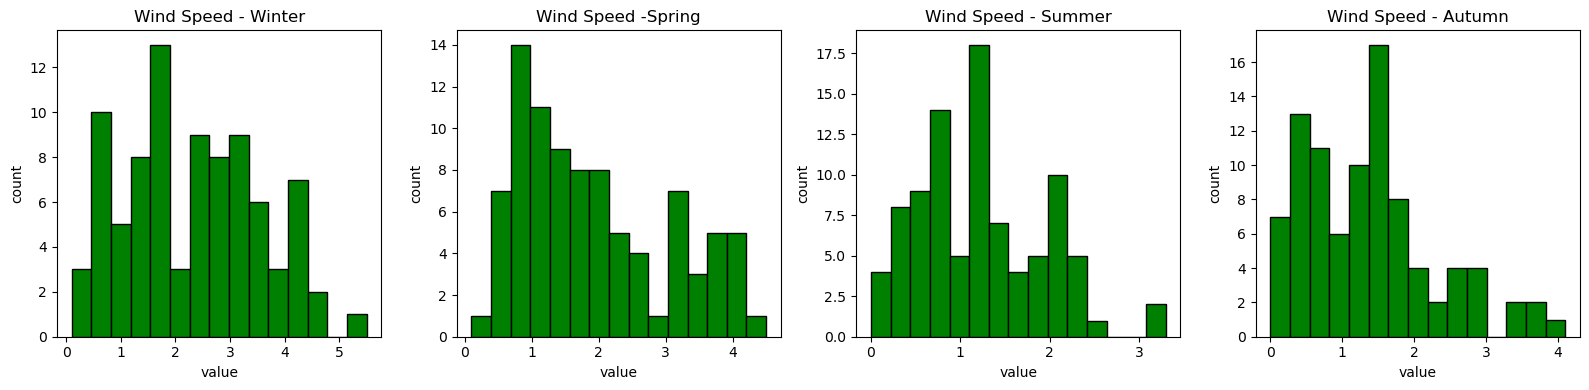

In [48]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Speed - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Speed -Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(summer['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Wind Speed - Summer")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Wind Speed - Autumn")
axis[3].set(xlabel='value', ylabel='count')

As expected wind speed is more widely distributed over a greater range in winter and spring than in the summer and autumn.

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

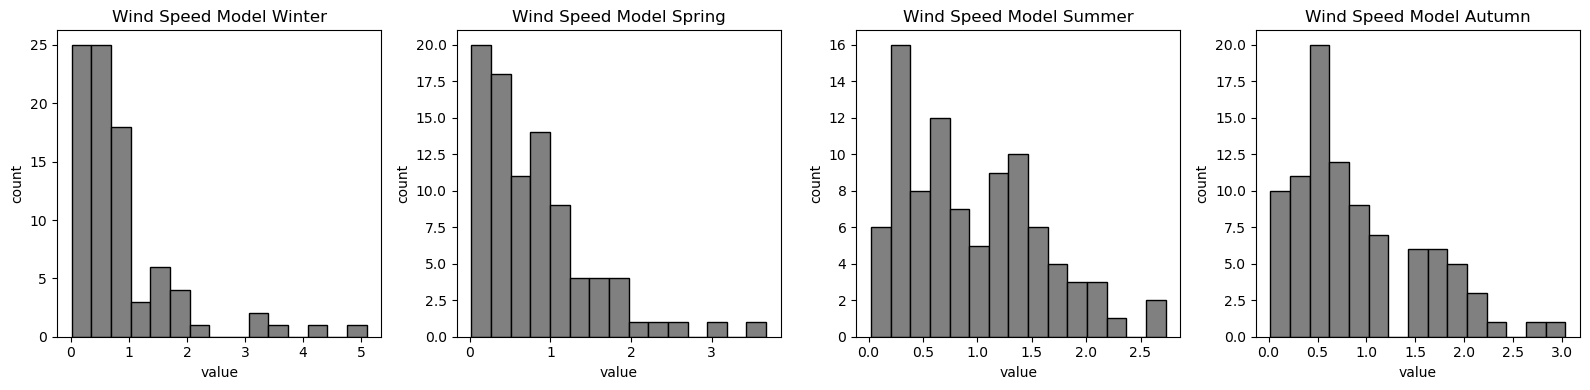

In [71]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(2)

ws_winter = np.random.weibull(1, winter_rows) # shape, 359 # no of data points to generate
ws_spring = np.random.weibull(1.15, spring_rows)
ws_summer = np.random.weibull(1.4, summer_rows)
ws_autumn = np.random.weibull(1.5, autumn_rows)


plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(ws_winter, color = 'grey', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Speed Model Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(ws_spring, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Speed Model Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(ws_summer, color = 'grey', edgecolor = 'black', bins=15)
axis[2].set_title("Wind Speed Model Summer")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(ws_autumn, color = 'grey', edgecolor = 'black', bins=15)
axis[3].set_title("Wind Speed Model Autumn")
axis[3].set(xlabel='value', ylabel='count')

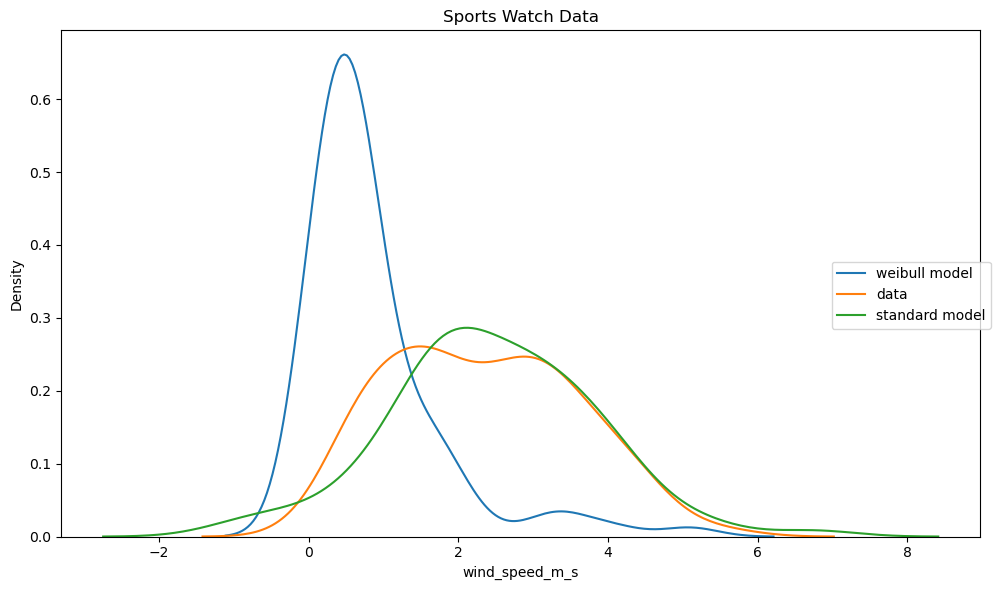

<AxesSubplot:xlabel='wind_speed_m_s', ylabel='Density'>

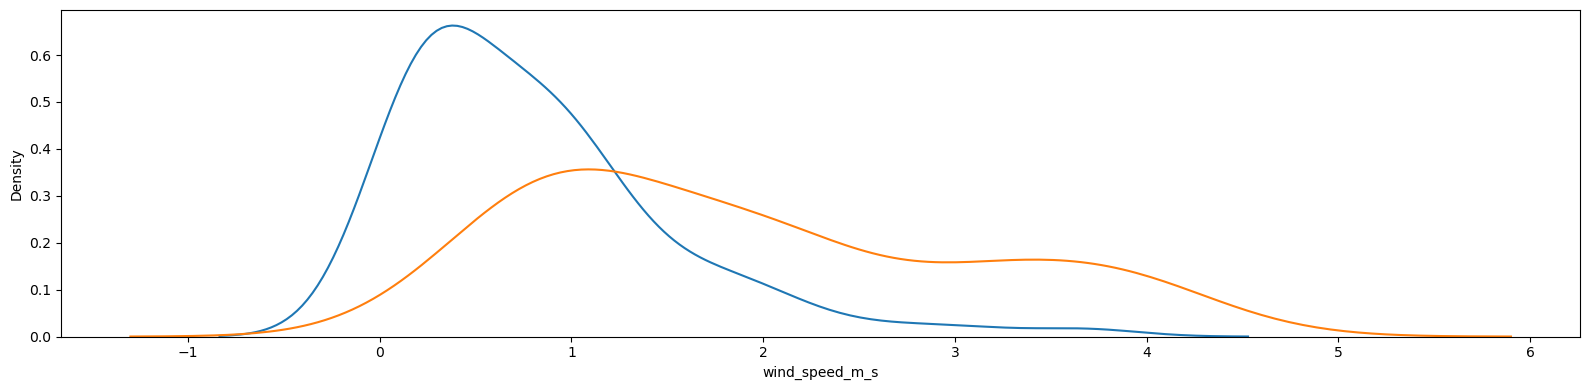

In [121]:
import seaborn as sns

fig = plt.figure(figsize=(10,6))
sns.kdeplot(ws_winter)
sns.kdeplot(winter['wind_speed_m_s'])
sns.kdeplot(np.random.normal(2.327586, 1.234267, size = winter_rows))
fig.legend(labels=['weibull model','data', 'standard model'], loc="right")

plt.title("Sports Watch Data")
plt.show()

sns.kdeplot(ws_spring)
sns.kdeplot(spring['wind_speed_m_s'])


AttributeError: 'AxesSubplot' object has no attribute 'kdeplot'

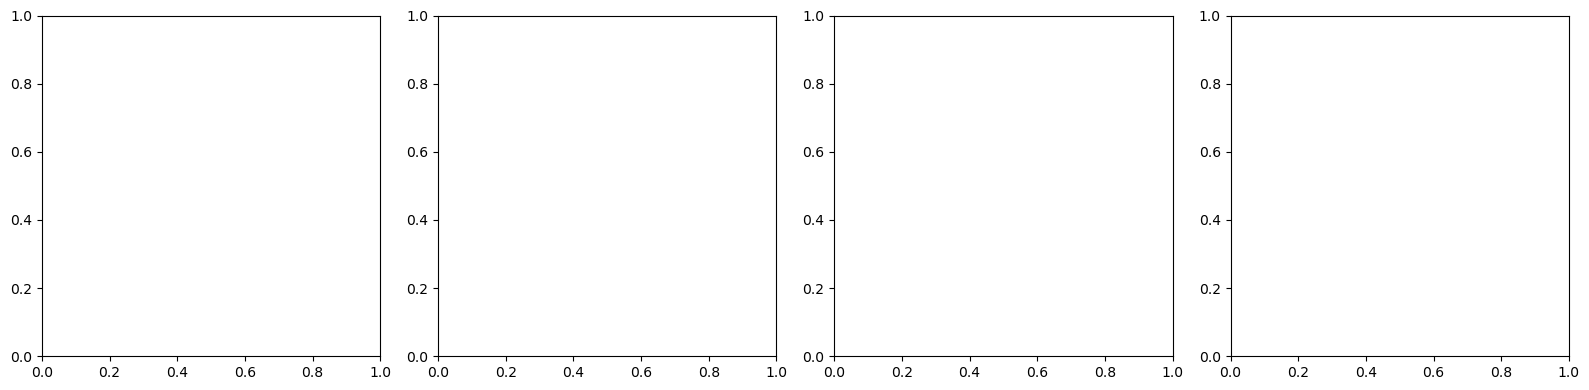

In [123]:
fig, axis = plt.subplots(1, 4)
axis[0].kdeplot(ws_winter)
axis[0].set_title("Wind Speed Model Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(ws_spring, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Speed Model Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(ws_summer, color = 'grey', edgecolor = 'black', bins=15)
axis[2].set_title("Wind Speed Model Summer")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(ws_autumn, color = 'grey', edgecolor = 'black', bins=15)
axis[3].set_title("Wind Speed Model Autumn")
axis[3].set(xlabel='value', ylabel='count')

## References <a id="references"></a>

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 7 Nov. 2023].

Chartio. (n.d.). How to Check If Any Value is NaN in a Pandas DataFrame. [online] Available at: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/. [Accessed 7 Nov. 2023].

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 7 Nov. 2023].

GeeksforGeeks. (2018). How to rename columns in Pandas DataFrame. [online] Available at: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/. [Accessed 7 Nov. 2023].

H, S. (2023). head () and tail () Functions Explained with Examples and Codes. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/. [Accessed 7 Nov. 2023].

Kumar, S. (2021). Deep Dive Analysis of Missing Values in Dataset. [online] Medium. Available at: https://towardsdatascience.com/deep-dive-analysis-of-missing-values-in-dataset-b387d9de6d4b. [Accessed 7 Nov. 2023].

Moffitt, C. (2018). Overview of Pandas Data Types - Practical Business Python. [online] pbpython.com. Available at: https://pbpython.com/pandas_dtypes.html. [Accessed 6 Nov. 2023].

Name, Y. (2022). Pandas filter dates by month, hour, day and last N days & weeks. [online] kanoki. Available at: https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 9 Nov. 2023].

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How do I properly set the Datetimeindex for a Pandas datetime object in a dataframe? [online] Available at: https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/. [Accessed 7 Nov. 2023].

Treadwell, M. (2014). Tableau Pills: Continuous and Discrete Data Roles. [online] InterWorks. Available at: https://interworks.com/blog/mtreadwell/2014/02/19/tableau-pills-continuous-and-discrete-data-roles/ [Accessed 7 Nov. 2023].

Walker, J. (2019). Tutorial: Time Series Analysis with Pandas – Dataquest. [online] Dataquest. Available at: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/. [Accessed 7 Nov. 2023].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 8 Nov. 2023].

Wikipedia Contributors (2023). Irish calendar. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Irish_calendar [Accessed 9 Nov. 2023].

wind-data.ch. (n.d.). Windenergie-Daten der Schweiz. [online] Available at: https://wind-data.ch/tools/weibull.php?lng=en. [Accessed 9. Nov. 2023].

www.javatpoint.com. (n.d.). Pandas DataFrame.describe() - javatpoint. [online] Available at: https://www.javatpoint.com/pandas-dataframe-describe. [Accessed 8 Nov. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame info() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_info.asp. [Accessed 7 Nov. 2023].

Zach (2021). How to Find Duplicates in Pandas DataFrame (With Examples). [online] Statology. Available at: https://www.statology.org/pandas-find-duplicates/. [Accessed 3 Nov. 2023].

## Associated Reading <a id="associated-reading"></a>

Flom, P. (2019). Are dates nominal, ordinal, interval or ratio? [online] Medium. Available at: https://medium.com/@peterflom/are-dates-nominal-ordinal-interval-or-ratio-ef567e10884 [Accessed 7 Nov. 2023].

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 8 Nov 2023].

numpy.org. (n.d.). Overview — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/index.html. [Accessed 8 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). API reference — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/index.html. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). How to handle time series data with ease — pandas 2.1.2 documentation. [online] Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). The real difference between float32 and float64. [online] Available at: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64 [Accessed 7 Nov. 2023].

---

*Notebook Ends*